# Laboratoire 4 : Développement d'un système intelligent
#### Département du génie logiciel et des technologies de l’information

| Étudiants             | NOMS - CODE PERMANENT                                   |
|-----------------------|---------------------------------------------------------|
| Cours                 | GTI770 - Systèmes intelligents et apprentissage machine |
| Session               | SAISON ANNÉE                                            |
| Groupe                | X                                                       |
| Numéro du laboratoire | X                                                       |
| Professeur            | Prof. NOM                                               |
| Chargé de laboratoire | NOM                                                     |
| Date                  | DATE                                                    |

In [1]:
import numpy as np
from custom.lab04.traitement import Traitement
from custom.lab04.train import Train

In [2]:
trh = Traitement()
stuff = Train()

index = ['SAMPLEID', 'TRACKID']
for i in range(420):
    index.append('component_{}'.format(i))
index.append('class')

dataset  = trh.Dataframe("data/csv/music/tagged_feature_sets/msd-trh_dev/msd-trh_dev.csv", index)
trainset = trh.Dataframe("data/csv/music/untagged_feature_sets/msd-trh_test_nolabels/msd-trh_test_nolabels.csv", index)
classe = dataset['class']

In [22]:

data  = dataset[dataset.columns.difference(['TRACKID', 'SAMPLEID', 'class'])]
train = trainset[trainset.columns.difference(['TRACKID', 'SAMPLEID', 'class'])]

X = data.values
Y = trh.Encoder(classe.values)

trainX = train.values

mmsX = trh.MinMax(X)

In [34]:
# avec shuffle
dataRnd = dataset.sample(frac=.9).reset_index(drop=True)

data  = dataRnd[dataRnd.columns.difference(['TRACKID', 'SAMPLEID', 'class'])]
train = trainset[trainset.columns.difference(['TRACKID', 'SAMPLEID', 'class'])]

X2 = data.values
Y2 = trh.Encoder(dataRnd['class'].values)

trainX = train.values

mmsX2 = trh.MinMax(X2)

In [30]:
## Shrinking

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

lda = LinearDiscriminantAnalysis(solver='eigen', shrinkage=1)
pca = PCA(n_components=.98 , svd_solver='auto')

xlda=lda.fit_transform(X, Y)
X_shrunk = pca.fit_transform(mmsX, Y)

In [35]:
xldaRnd=lda.fit_transform(X2, Y2)
Xrnd_shrunk = pca.fit_transform(mmsX2, Y2)

In [36]:
print(X_shrunk.shape)
print(Xrnd_shrunk.shape)

(179555, 140)
(161600, 141)


In [6]:
#clf1 = stuff.Distance(15)
#clf2 = stuff.Bernoulli()
#clf3 = stuff.RBF()
#estimators = [('Knn', clf1),('Bayes', clf2),('SVM', clf3)]

In [15]:
knnAcc = stuff.AccuracyScore(stuff.Bernoulli(), xlda, Y)
knnF1  = stuff.F1Score(stuff.Bernoulli(), xlda, Y)
print('Acc {0} || F1 {1}'.format(knnAcc, knnF1))

#stuff.Vote(X, Y, trainX, estimators)

C:\Users\sk8_e\AppData\Local\conda\conda\envs\gti770\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sk8_e\AppData\Local\conda\conda\envs\gti770\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sk8_e\AppData\Local\conda\conda\envs\gti770\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sk8_e\AppData\Local\conda\conda\envs\gti770\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samp

Acc 0.06599649386287022 || F1 0.005046183154624748


C:\Users\sk8_e\AppData\Local\conda\conda\envs\gti770\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


C:\Users\sk8_e\AppData\Local\conda\conda\envs\gti770\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sk8_e\AppData\Local\conda\conda\envs\gti770\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sk8_e\AppData\Local\conda\conda\envs\gti770\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sk8_e\AppData\Local\conda\conda\envs\gti770\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samp

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'): Acc 0.06599649386287022 || F1 0.005046183154624748


C:\Users\sk8_e\AppData\Local\conda\conda\envs\gti770\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sk8_e\AppData\Local\conda\conda\envs\gti770\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sk8_e\AppData\Local\conda\conda\envs\gti770\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sk8_e\AppData\Local\conda\conda\envs\gti770\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samp

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'): Acc 0.06599649386287022 || F1 0.005046183154624748


C:\Users\sk8_e\AppData\Local\conda\conda\envs\gti770\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sk8_e\AppData\Local\conda\conda\envs\gti770\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sk8_e\AppData\Local\conda\conda\envs\gti770\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sk8_e\AppData\Local\conda\conda\envs\gti770\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samp

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'): Acc 0.06599649386287022 || F1 0.005046183154624748


C:\Users\sk8_e\AppData\Local\conda\conda\envs\gti770\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sk8_e\AppData\Local\conda\conda\envs\gti770\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sk8_e\AppData\Local\conda\conda\envs\gti770\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sk8_e\AppData\Local\conda\conda\envs\gti770\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samp

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'): Acc 0.06599649386287022 || F1 0.005046183154624748


C:\Users\sk8_e\AppData\Local\conda\conda\envs\gti770\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sk8_e\AppData\Local\conda\conda\envs\gti770\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sk8_e\AppData\Local\conda\conda\envs\gti770\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sk8_e\AppData\Local\conda\conda\envs\gti770\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samp

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'): Acc 0.06599649386287022 || F1 0.005046183154624748
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'): Acc 0.06599649386287022 || F1 0.005046183154624748


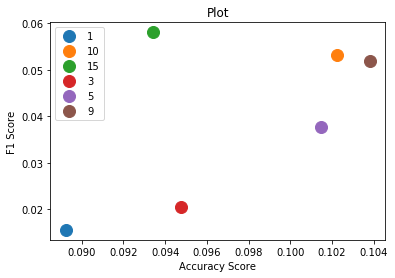

In [16]:
clfs = [stuff.DepthK(1), stuff.DepthK(3), stuff.DepthK(5), stuff.DepthK(9), stuff.DepthK(10), stuff.DepthK(15)]
dtAcc = []
dtF1 = []

for clf in clfs:
    acc = stuff.AccuracyScore(clf, xlda, Y)
    f1 = stuff.F1Score(clf, xlda, Y)
    print('{2}: Acc {0} || F1 {1}'.format(knnAcc, knnF1, clf))
    dtAcc.append(acc)
    dtF1.append(f1)
    
trh.PrintPlot(dtAcc, dtF1, ['1','3','5','9','10','15'])

In [37]:
clf = stuff.DepthK(40)
acc = stuff.AccuracyScore(clf, xlda, Y)
f1 = stuff.F1Score(clf, xlda, Y)
print('{2}: Acc {0} || F1 {1}'.format(acc, f1, clf))

acc = stuff.AccuracyScore(clf, xldaRnd, Y2)
f1 = stuff.F1Score(clf, xldaRnd, Y2)
print('{2}: Acc {0} || F1 {1}'.format(acc, f1, clf))

clf = stuff.DepthK(40)
acc = stuff.AccuracyScore(clf, X_shrunk, Y)
f1 = stuff.F1Score(clf, X_shrunk, Y)
print('{2}: Acc {0} || F1 {1}'.format(acc, f1, clf))

acc = stuff.AccuracyScore(clf, Xrnd_shrunk, Y2)
f1 = stuff.F1Score(clf, Xrnd_shrunk, Y2)
print('{2}: Acc {0} || F1 {1}'.format(acc, f1, clf))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=40,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'): Acc 0.06184168824126872 || F1 0.054299836748690745
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=40,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'): Acc 0.062035697742978145 || F1 0.05414110494600448
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=40,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
          

## Introduction et revue de la littérature

## Question 2
### Configuration de l'environnement

### Partitionnement des données

### Validation

### Prétraitement

## Question 3
### Description des modèles et justifications

## Question 4
### Matrice des expérimentations

### Matrice des résultats de l'étude des hyperparamètres

### Graphiques

### Discussion

## Question 5
### Présentation de la conception

## Question 6
### Hyperparamètres des modèles choisis dans la conception

### Matrice des résultats

### Discussion

## Question 7 
### Formulation des recommandations

## Conclusion